# Predicting Animal Adoptions at the AAC (Austin Animal Center)
***

# Table of Contents
***

## [Goals](#goals)

## [Acquire](#acquire)

## [Prepare](#prepare)

## [Explore](#explore)

## [Model](#model)

## [Conclusion](#conclusion)
<br>

# Goals <a id='goals'></a>
***

My main goal for this project is to create a model that will acurrately predict which cats and dogs will be adopted from the Austin Animal Center.

I will deliver the following 
- aac_project_notebook.ipynb
    - This notebook which provides a start-to-finish walkthrough of the project
- README.md
    - A markdown file that provides various information about this project including a data dictionary, project plan, and a link to the source data
- wrangle.py
    - A file that contains all of the custom functions featured in this notebook
- A presentation of the project
    - A 3-5 minute presentation that summarizes the findings of this project (link to presentation slides below)
        - https://docs.google.com/presentation/d/1fbCmj9fFDnU3EkA2hf3d9QrSljuNQKyP46vZXkLwO8w/edit?usp=sharing

In [1]:
# establishing environment
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from wrangle import get_aac, prep_aac, wrangle_aac

# Acquire<a id='acquire'></a>
I'll begin by acquiring the data from a local CSV file. The data I'm using can be accessed via a link in the README file of this repository.
***

In [2]:
df = get_aac()

In [3]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


### Acquire Takeaways
- Acquired data from local csv file using pandas __read_csv__ function
- Data can also be acquired via the __wrangle_aac__ function in the __wrangle.py__ file
    - Note that the __wrangle_aac__ function will also prep the data for exploration

# Prepare<a id='prepare'></a>
I'm now going to prepare the data for exploration.
***

### Prepping Data via prep_aac function

In [4]:
# prepping data with changes outlined in prepare takeaway section (below)
train, validate, test = prep_aac(df)

train.transpose()

,41664,8001,70226,70696,39646,78297,34786,28404,64445,31254,...,50093,41695,53601,7047,29094,33753,37539,18333,65236,24182
agg_breed,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intake_datetime,2015-10-30 15:38:00,2014-07-19 10:40:00,2017-07-14 18:52:00,2017-07-25 10:41:00,2015-09-13 11:50:00,2018-02-08 00:00:00,2015-06-17 15:55:00,2015-02-20 12:46:00,2017-03-26 15:01:00,2015-04-25 12:03:00,...,2016-05-11 12:56:00,2015-10-25 16:06:00,2016-07-14 14:04:00,2013-11-30 14:44:00,2015-03-10 13:12:00,2015-06-02 18:22:00,2015-08-04 16:24:00,2014-10-04 11:26:00,2017-04-14 13:44:00,2014-11-05 15:18:00
age_upon_intake_(days),60,365,730,21,21,21,730,120,3650,21,...,30,60,60,730,730,60,150,180,270,30
age_upon_intake_(days)_s,0.00747198,0.0454545,0.0909091,0.00261519,0.00261519,0.00261519,0.0909091,0.014944,0.454545,0.00261519,...,0.00373599,0.00747198,0.00747198,0.0909091,0.0909091,0.00747198,0.01868,0.0224159,0.0336239,0.00373599
intake_number,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,2,1,1,1,1,1
intake_number_s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.166667,0.166667,0,0,0,0,0
outcome_datetime,2015-11-10 11:59:00,2014-07-29 12:58:00,2017-08-19 13:59:00,2017-09-30 09:51:00,2015-09-13 12:20:00,2018-02-08 13:54:00,2015-07-14 18:56:00,2015-02-20 14:57:00,2017-03-26 17:24:00,2015-06-16 08:30:00,...,2016-05-13 18:37:00,2015-11-01 19:08:00,2016-08-21 19:00:00,2013-12-03 15:46:00,2015-03-28 18:31:00,2015-06-07 18:21:00,2015-08-16 18:16:00,2014-10-12 15:25:00,2017-04-18 18:01:00,2014-12-11 19:07:00
age_upon_outcome_(days),60,365,730,90,21,21,730,120,3650,60,...,60,60,120,730,730,60,150,180,300,60
age_upon_outcome_(days)_s,0.00747198,0.0454545,0.0909091,0.011208,0.00261519,0.00261519,0.0909091,0.014944,0.454545,0.00747198,...,0.00747198,0.00747198,0.014944,0.0909091,0.0909091,0.00747198,0.01868,0.0224159,0.0373599,0.00747198
outcome_number,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,2,1,1,1,1,1


### Prepare Takeaways
After reviewing the data for this project, I elected to make the following changes by creating a function, __prep_aac__, located in the __wrangle.py file__. 

Alternatively, the __wrangle_aac__ function from the __wrangle.py file__ can be ran to both acquire and prep the data simultaneously.

- Drop the following columns
    - animal_id_outcome | animal_id_intake
        - Unique id's won't be useful in predicting outcomes
    - age_upon_outcome_(years) | age_upon_outcome_age_group
        - Information can be derived from alternate column, age_upon_outcome_(days)
    - age_upon_intake_(years) | age_upon_intake_age_group
        - Information can be derived from alternate column, age_upon_intake_(days)
    - outcome_year | outcome_monthyear | outcome_weekday | outcome_hour | outcome_month
        - Information held in outcome_datetime column
    - intake_month | intake_year | intake_monthyear | intake_weekday | intake_hour
        - Information held in intake_datetime column
    - time_in_shelter
        - Same relative information held in 'time_in_shelter_ days
    - breed
        - added column that indicates if breed or mixed breed is one that is commonly labeled as "aggressive"
    - color
        - Highly variable, categorical column. 
        - At a later time I'd like to bin these values and explore them for statistical signifigance
    - 'dob_year', 'dob_month', 'dob_monthyear'
        - Since I have the age of each animal at the time of intake and outcome, I won't need to calculate their age using this variable
    - datetime, monthyear
        - Duplicate columns that presumably reflect when an outcome (adopted, transferred, etc.) occured
        - The scope of this project will only include data pertaining to outcomes, at a later time I will expand this scope to include data from when each animal was inducted and at that time I will make use of one of these columns
    - found_location
        - I don't expect the location an animal is found to have a strong impact with their chance of being adopted. May explore later.
    - count
        - Does not relate to data, was added by kaggle user for their own work
- Fill outcome_subtype null values with "unknown"
- Drop returned to owner rows
    - Animals that were returned to owners weren't eligible for adoption in most cases
- Drop rows with outcome_type "disposal"
    - These were rows where that represent animals that were deceased upon arrival at the AAC
- Drop rows with animal_type that is not cat or dog
    - Scope of project is for cats and dogs since most other species that are transferred to wildlife facilities due to their uncommon species or euthanized as rabies-risks.
- Rename columns where appropriate to better reflect the data they represent
- Convert age_upon_outcome to value representing weeks
    - Create scaled version of this column if this becomes a model feature
- Add boolean columns for 
    - animal_type
    - intake_condition
    - intake_type
- Add binary categorical column 'is_adopted' that represents if animal was adopted based on outcome_type value
- Add is_elderly column that reflects if animal is 10 or more years old
    - After seeing how age impacts adoption rates I'm adding this column
- Split sex_upon_outcome into categorical columns for neutered/spaded and sex
    - is_neutered_or_spaded
    - is_male
    - is_female
    - sex_unknown
- Drop null values
    - Very few nulls so dropping won't have a significant impact
- Splitting data into train, validate, and test sets

# Explore<a id='explore'></a>
I'm now going to explore the data using plots and hypothesis tests to identify viable features for predicting adoption.
***

## Feature: age_group_year
Plotting to see how age affects adoption rates. I suspect that older animals are adopted less often.

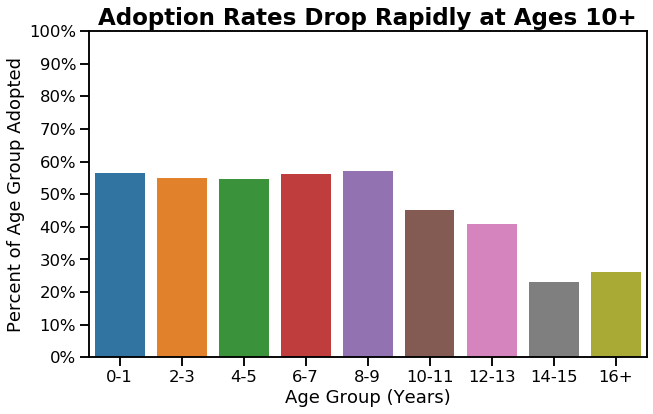

In [5]:
age_group_adopts = train.groupby('age_group_year').mean()[['is_adopted']].sort_values('age_group_year')

age_group_adopts.index = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16+']

sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_adopts, x=age_group_adopts.index, y='is_adopted')
plt.xlabel("Age Group (Years)")
plt.ylabel("Percent of Age Group Adopted")
plt.title("Adoption Rates Drop Rapidly at Ages 10+", fontweight='bold', fontsize=23)
fmt = [f'{i:0.0%}' for i in np.linspace(0, 1, 11)]
plt.yticks(np.linspace(0, 1, 11), labels=fmt)
plt.show()

- Adoption rates between animals ages 0-9 years of age are fairly close
- From age 10 onward, adoption rates drop rapidly
- The age 16+ age group has roughly half the adoption rate of the 0-1 age group

## Feature: animal_type

### Comparing adoption rates: cats vs. dogs

In [6]:
# using groupby to examine adoption rates within species
cat_v_dog = train.groupby('animal_type').mean()[['is_adopted']]

cat_v_dog

,is_adopted
animal_type,
cat,0.455803
dog,0.644075


- Cat adoption rate
    - 45% of all cats are adopted
- Dog adoption rate
    - 64% of all dogs are adopted

### Visualization

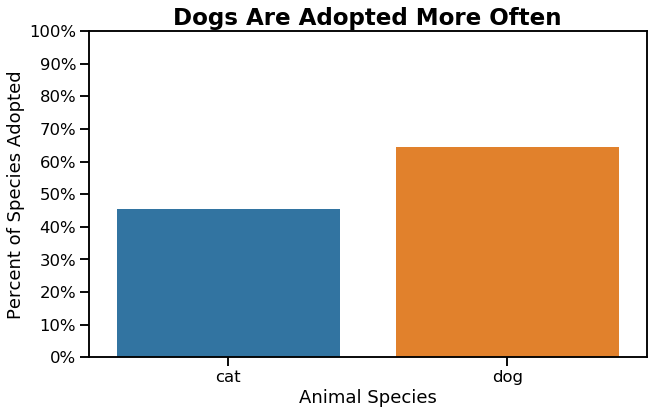

In [119]:
type_adopt = train.groupby('animal_type').mean()[['is_adopted']].sort_values('animal_type')

sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.barplot(data = type_adopt, x = type_adopt.index, y='is_adopted')
plt.xlabel("Animal Species")
plt.ylabel("Percent of Species Adopted")
plt.title("Dogs Are Adopted More Often", fontweight='bold', fontsize=23)
fmt = [f'{i:0.0%}' for i in np.linspace(0, 1, 11)]
plt.yticks(np.linspace(0, 1, 11), labels=fmt)
plt.show()

### Chi-Squared Test

### Hypothesis
<br>
H0: Adoption and animal type are independent
<br>
Ha: Adoption and animal type are dependent

In [8]:
# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_atype)

# printing results
print('alpha = .05\n')
print(f'p = {p:.4f}')

alpha = .05

p = 0.0000


- Since p is less than alpha, I am rejecting the null hypothesis that adopation and animal type are independent
- Based on the average adoption rates between species and bar plot it appears that dogs are favored for adoption over cats

## Feature: sex

In [10]:
# using groupby to examine adoption rates within species
male_v_female = train.groupby('sex').mean()[['is_adopted']]

male_v_female

,is_adopted
sex,
Female,0.585855
Male,0.580576
Unknown,0.000000


- Females
    - 58% of all male animals are adopted
- Males
    - 58% of all female animals are adopted
- Unknown gender
    - 0% of all Unknown gender animals are adopted
    - Majority of unknown gender animals are stray cats who are transferred to another facility
<br>
<br>
- Rates of adoption between male and female animals are virtually even
- Male and female animals have much higher adoption rates than animals of unknown gender



### Visualization

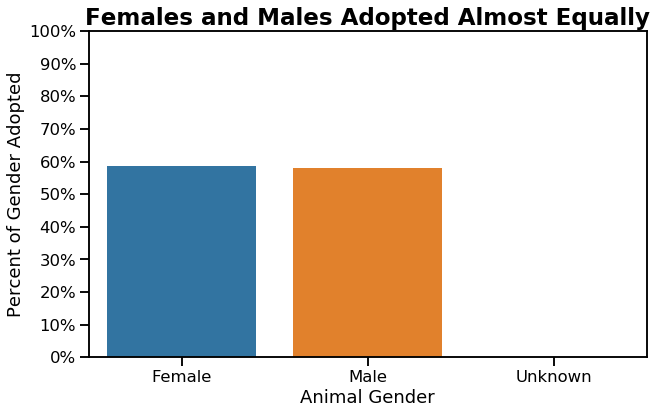

In [122]:
gender_adopt = train.groupby('sex').mean()[['is_adopted']].sort_values('sex')

sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.barplot(data = gender_adopt, x = gender_adopt.index, y='is_adopted')
plt.xlabel("Animal Gender")
plt.ylabel("Percent of Gender Adopted")
plt.title("Females and Males Adopted Almost Equally", fontweight='bold', fontsize=23)
fmt = [f'{i:0.0%}' for i in np.linspace(0, 1, 11)]
plt.yticks(np.linspace(0, 1, 11), labels=fmt)
plt.show()

### Chi-Squared Test

### Hypothesis
<br>
H0: Adoption and gender (including unknown gender) are independent
<br>
Ha: Adoption and gender (including unknown gender) are dependent

In [12]:
# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_sex)

# printing results
print('alpha = .05\n')
print(f'p     = {p:.4f}')

alpha = .05

p     = 0.0000


- Since p is less than alpha, I am rejecting the null hypothesis that adoption and gender (including unknown gender) are independent
- I suspect that the unknown gender values are responsible for the low p value so I'm going to conduct this test again without them



### Hypothesis
<br>
H0: Adoption and gender (not including unknown gender) are independent
<br>
Ha: Adoption and gender (not including unknown gender) are dependent

In [13]:
# removing rows where gender is unknown
train_mf = train[train.sex != "Unknown"]

# creating crosstab using sex and is_adopted columns
observed_sex_mf = pd.crosstab(train_mf.sex, train_mf.is_adopted)

# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_sex_mf)

# printing results
print('alpha = .05\n')
print(f'p     = {p:.4f}')

alpha = .05

p     = 0.3439


- Since p is greater than alpha, I fail to reject the null hypothesis that adoption and gender are independent
- This makes sense given that adoption rates only significantly differ between known and unknown gender animals and not between the animals with identified genders (male and female)
- The percentages of adoption seen between genders and visualization suggest that gender only significantly impacts adoption if the animal's gender is unknown 

## Feature: sterilized_income
The AAC only sterilizes animals at the adopters requests upon adoption. Do animals that come into the AAC already having been sterilized having higher rates of adoption?

In [109]:
# using groupby to examine adoption rates within species
income_ster = train.groupby('sterilized_income').mean()[['is_adopted']]

income_ster

,is_adopted
sterilized_income,
0,0.537124
1,0.615271


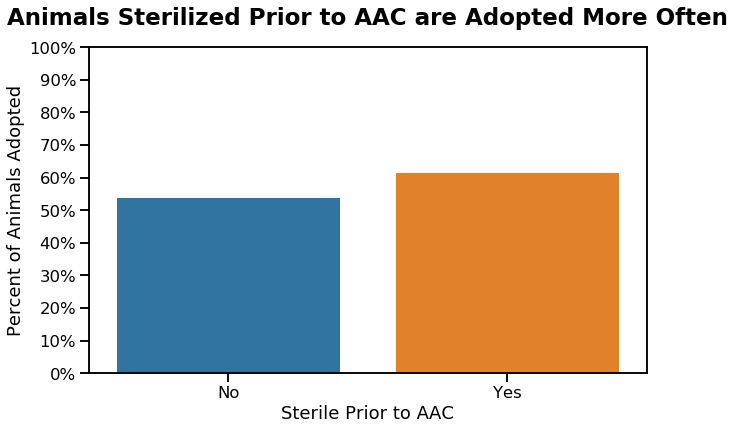

In [133]:
sterile_adopt = train.groupby('sterilized_income').mean()[['is_adopted']].sort_values('sterilized_income')
sterile_adopt.index = ['No', 'Yes']
sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.barplot(data = sterile_adopt, x = sterile_adopt.index, y='is_adopted')
plt.xlabel("Sterile Prior to AAC")
plt.ylabel("Percent of Animals Adopted")
plt.title("Animals Sterilized Prior to AAC are Adopted More Often", fontweight='bold', fontsize=23, y=1.05)
fmt = [f'{i:0.0%}' for i in np.linspace(0, 1, 11)]
plt.yticks(np.linspace(0, 1, 11), labels=fmt)
plt.show()

### Hypothesis
<br>
H0: sterilized_income and adoption are independent
<br>
Ha: sterilized_income and adoption are dependent

In [128]:
# creating crosstab using sex and is_adopted columns
observed_sterile = pd.crosstab(train.sterilized_income, train.is_adopted)

# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_sterile)

# printing results
print('alpha = .05\n')
print(f'p     = {p:.4f}')

alpha = .05

p     = 0.0000


- Since p is less than alpha, I reject the null hypothesis that income_sterilization and gender are independent
- The calculated percentages and visualization indicate that animals that a higher percent of animals sterilized prior to the AAC are adopted than those were not sterilized prior to the AAC

## Feature: agg_breed
Many people believe that there are "agressive" breeds of dogs. Dogs of these breeds may have a harder time getting adopted. 

In [14]:
dogs = train[train.animal_type == 'dog']

# using groupby to examine adoption rates within species
agg = dogs.groupby('agg_breed').mean()[['is_adopted']]

agg

,is_adopted
agg_breed,
0,0.660154
1,0.565603


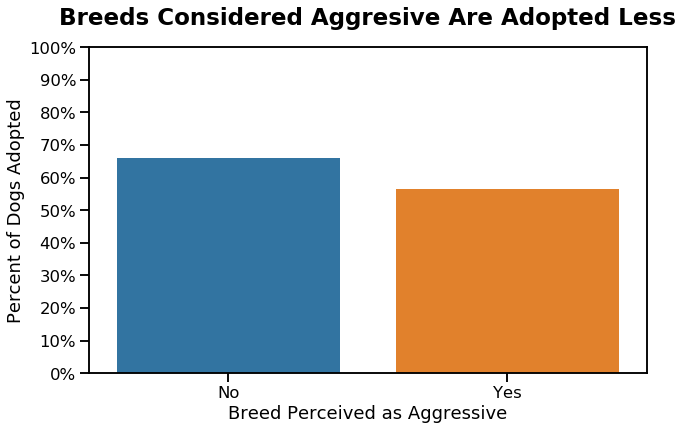

In [15]:
sns.set_context('talk')

agg.index = (['No', 'Yes'])
plt.figure(figsize=(10, 6))
sns.barplot(data=agg, x=agg.index, y='is_adopted')
plt.xlabel("Breed Perceived as Aggressive")
plt.ylabel("Percent of Dogs Adopted")
plt.title("Breeds Considered Aggresive Are Adopted Less", fontweight='bold', fontsize=23,y = 1.05)
fmt = [f'{i:0.0%}' for i in np.linspace(0, 1, 11)]
plt.yticks(np.linspace(0, 1, 11), labels=fmt)
plt.show()

In [16]:
# creating crosstab using sex and is_adopted columns
observed_breed_agg = pd.crosstab(dogs.agg_breed, train_mf.is_adopted)

# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_breed_agg)

# printing results
print('alpha = .05\n')
print(f'p     = {p:.4f}')

alpha = .05

p     = 0.0000


- Since p is less than alpha I am rejecting the null hypothesis that dogs of a breed that is perceived as aggressive and adoption are indenpendent
- The calculated percentages and visualization suggest that dogs of an aggressive breed are adopted less often

### Exploration Takeaways
- A lower percentage of animals that are 10 years or older are adopted than their younger counterparts
- A percentage of dogs that are adopted is higher than the percentage of cats that are adopted
- The percentage of male and female animals adopted are nearly identical
- None of the animals in the dataset with ah unknown gender were adopted
    - Most of these animal were stray cats who were transferred to another facility
    - I'll be exploring these animals more in-depth in my upcoming expansion of this project
- The adoption percentage of animals that are sterilized prior to entering the AAC is higher than the adoption percentage of other animals
- Dogs of a breed that is perceived as aggressive are adopted less often than other breeds
- Two-sample, one-tailed t-test suggested that....
- Chi square tests showed that is_adopted and all of the following variables are not independent of each other
    - animal_type (cat or dog)
    - sex (male, female, unknown)
    - agg_breed (if a breed of dog is commonly perceived as aggressive)
    - sterilized_income (if an animal was sterilized prior to entering the AAC)

# Model<a id='model'></a>
I'll now create several models that will predict whether an animal was adopted based on it's various features.
***

## Baseline

In [75]:
# checking most common value of target variable
# ie. are animals more adopted more often than not?
train.is_adopted.value_counts()

1    18670
0    14904
Name: is_adopted, dtype: int64

In [76]:
# setting baseline prediction to 0
train['baseline_pred'] = 1

In [77]:
# printing performance metrics
print(classification_report(train.is_adopted, train.baseline_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14904
           1       0.56      1.00      0.71     18670

    accuracy                           0.56     33574
   macro avg       0.28      0.50      0.36     33574
weighted avg       0.31      0.56      0.40     33574



## Train

In [78]:
# setting target variable
y_train = train['is_adopted']

### Model 1 - Logistic Regression

In [79]:
# setting feature for model
X_train_m1 = train[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating logistic regression object
lr = LogisticRegression(random_state=123)

# fitting model to data
lr.fit(X_train_m1, y_train)

# creating column with model predictions
train['m1_prediction'] = lr.predict(X_train_m1)

# printing performance metrics
print(classification_report(train.is_adopted, train.m1_prediction))

              precision    recall  f1-score   support

           0       0.74      0.30      0.43     14904
           1       0.62      0.91      0.74     18670

    accuracy                           0.64     33574
   macro avg       0.68      0.61      0.58     33574
weighted avg       0.67      0.64      0.60     33574



### Model 2 - Random Forest

In [80]:
# creating DF with selected features for logistic regression model
X_train_m2 = train[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating random forest object
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf = 3,
                            n_estimators=100, max_depth=4, random_state=123)

# fitting to data
rf.fit(X_train_m2, y_train)

# making predictions
train['m2_prediction'] = rf.predict(X_train_m2)

# printing performance metrics
print(classification_report(train.is_adopted, train.m2_prediction))

              precision    recall  f1-score   support

           0       0.98      0.25      0.40     14904
           1       0.62      1.00      0.77     18670

    accuracy                           0.66     33574
   macro avg       0.80      0.62      0.58     33574
weighted avg       0.78      0.66      0.60     33574



### Model 3 - Decision Tree

In [81]:
# creating DF with selected features for decision tree model
X_train_m3 = train[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating decision tree object
dtree = DecisionTreeClassifier(max_depth = 3, random_state=123)

# fitting d tree to data
dtree.fit(X_train_m3, y_train)

# predicting values
train['m3_prediction'] = dtree.predict(X_train_m3)

# printing performance metrics
print(classification_report(train.is_adopted, train.m3_prediction))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39     14904
           1       0.62      1.00      0.77     18670

    accuracy                           0.66     33574
   macro avg       0.81      0.62      0.58     33574
weighted avg       0.79      0.66      0.60     33574



### Model 4 - Knearest Neighbor

In [82]:
# creating DF with selected features for KNN model
X_train_m4 = train[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating KNN object
knn = KNeighborsClassifier(n_neighbors=3, weights = 'uniform')

# fitting model to data
knn.fit(X_train_m4, y_train)

# making predictions on x train
m4_y_pred = pd.DataFrame(knn.predict(X_train_m4))

# creating column with model predictions
train['m4_prediction'] = knn.predict(X_train_m4)

# printing performance metrics
print(classification_report(train.is_adopted, train.m4_prediction))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59     14904
           1       0.68      0.78      0.72     18670

    accuracy                           0.67     33574
   macro avg       0.67      0.66      0.66     33574
weighted avg       0.67      0.67      0.66     33574



- All models surpassed baseline's accuracy of 57%
- Top 2 models are random forest and decision tree
    - Model 2 - Random Forest Accuracy: 76%
    - Model 3 - Decision Tree Accuracy: 77%
    - Both will be used on the validate set

## Validate

In [83]:
# setting target variable
y_val = validate['is_adopted']

### Model 2 - Random Forest

In [84]:
# setting features for model
X_val_m2 = validate[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating column with model predictions
validate['m2_prediction'] = rf.predict(X_val_m2)

# printing performance metrics
print(classification_report(validate.is_adopted, validate.m2_prediction))

              precision    recall  f1-score   support

           0       0.97      0.24      0.39      6318
           1       0.63      0.99      0.77      8071

    accuracy                           0.67     14389
   macro avg       0.80      0.62      0.58     14389
weighted avg       0.78      0.67      0.60     14389



### Model 3 - Decision Tree

In [85]:
# setting features for model
X_val_m3 = validate[['age_upon_outcome_(days)_s', 'is_cat', 'is_dog', 
                    'sex_unknown', 'is_elderly']]

# creating column with model predictions
validate['m3_prediction'] = dtree.predict(X_val_m3)

# printing performance metrics
print(classification_report(validate.is_adopted, validate.m3_prediction))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50      6318
           1       0.55      0.38      0.45      8071

    accuracy                           0.47     14389
   macro avg       0.49      0.49      0.47     14389
weighted avg       0.49      0.47      0.47     14389



- Both models performed with identical accuracy
- Random Forest produced higher average f1 score so it will be used on test data

## Test

### Model 2 - Random Forest

In [86]:
# setting target variable
y_test = test['is_adopted']

# setting features for model
X_test_m2 = test[['age_upon_outcome_(days)_s', 'is_dog', 
                    'sex_unknown', 'sterilized_income', 'agg_breed']]

# creating column with model predictions
test['m2_prediction'] = rf.predict(X_test_m2)

# printing performance metrics
print(classification_report(test.is_adopted, test.m2_prediction))

              precision    recall  f1-score   support

           0       0.98      0.25      0.39      5476
           1       0.61      1.00      0.76      6515

    accuracy                           0.65     11991
   macro avg       0.80      0.62      0.58     11991
weighted avg       0.78      0.65      0.59     11991



- Random forest model produced performed with 76% accuracy on test data
- Average accuracy on out-of-sample data, 76%

### Modeling Takeaways

- Created models using the following algorithms 
    - logistic regression
    - random forest
    - k-nearest neighbor
    - decision tree


- __Train Set Model Performances__
    - Logistic Regression
        - Accuracy: 75%
    - Random Forest
        - Accuracy: 76%
    - Decision Tree 
        - Accuracy: 77%
    - K-Nearest Neighbor
        - Accuracy: 74%
    
    
- __Validate Set Model Performances__
    - Random Forest 
        - Accuracy: 76%
        - Average F1 Score: 76%
    - Decision Tree 
        - Accuracy: 76%
        - Average F1 Score: 75%


- __Test Set Model Performance__
    - Random Forest 
        - Accuracy: accuracy on in-sample (seen) data: 76%
        - Average accuracy on out-of-sample (unseen) data: 76%
       

# Conclusion<a id='conclusion'></a>

### Acquire
- Acquired data from local csv file

### Prepare
- Prepped data with various changes, namely:
    - Dropped unwanted columns
    - Split column that contained both sex and neutered or spaded informatino
    - Added boolean columns for categorical data
    - Renaming columns
    - Dropping null values
    - Converting age of animals to weekly units
    - Splitting Data
    
### Explore
- Crosstabs and bar plots showed lower rates of adoption for animals that were not identified as cats or dogs, those of an unidentified sex, and those that had not yet been sterilized
- Chi-squared tests showed that animal type, sex, and sterilization status are not independent of whether an animal is adopted
- T-test gave evidence that adopted animals were younger on average than those than had not been adopted
- The drivers of adoption appear to be
    - animal species
    - sterilization status (neutered or spaded)
    - age
    - sex
    
### Model
- Created baseline model that produced 57% accuracy on train data
- Created 4 alternate models using various algorithms
- Best Model was created with the following profile
    - Type: Random Forest
    - Features: 
        - age_in_weeks_s
        - is_cat, is_dog, is_other
        - is_male, is_female, is_unknown
        - is_neutered_or_spayed
- Best model maintained 76% accuracy on all datasets

### Recommendations
- When feasible, spay or neuter animals to increase their likelihood of adoption
- Develop a program that aims to pair older animals with suitable homes
- Look for new venues that may be able to take in uncommon animals such as exotic pet sanctuaries

### Predictions
- By following the recommendations above, the AAC may be able to increase their adoption rates via finding homes for animals who would otherwise have not found one

### Plans for the future
- I'd like to focus on exploring the connections between various features
    - For example, are animals of an unknown type more less likely to be confirmed as sterilized?
- I'd also like to incorporate more features, such as color
    - For example, are brown dogs more likely to be adopted that other dogs of other colors
- I'll also being incorporating data about each animal's induction into the shelter to gain further insights
    - For example, does the amount of time an animal has spent in the shelter affect its likelihood of adoption?

In [50]:
pd.crosstab(train.sterilized_income, train.is_adopted)

is_adopted,0,1
sterilized_income,,
0,11770,13658
1,3134,5012


In [51]:
train.groupby(train.sterilized_income).mean()['is_adopted']

sterilized_income
0    0.537124
1    0.615271
Name: is_adopted, dtype: float64

In [52]:
train.groupby(train.sterilized_outcome).mean()['is_adopted']

sterilized_outcome
0    0.072404
1    0.758033
Name: is_adopted, dtype: float64